<a href="https://colab.research.google.com/github/gustavohroos/CNC/blob/main/Relatorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 2 Cálculo Numérico Computacional

---

Nome: Gustavo Henrique Roos <br/>
Matrícula: 20101184

# Métodos para encontrar raízes

Importação de bibliotecas

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Eliminação de Gauss

In [116]:
def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

In [117]:
def eliminacao_gauss(A, b, pivotamento=False):
    #Eliminação de Gauss com truncamento de 3 casas
    n = A.shape[0]
    A = trunc(A, 3)
    b = trunc(b, 3)
    for j in range(n):
        if pivotamento:
            p = max(range(j, n), key=lambda i: abs(A[i][j]))
            if p != j:
                A[[j, p]] = A[[p, j]]
                b[[j, p]] = b[[p, j]]

        if abs(A[j][j]) > 0:
            r = trunc(1 / A[j][j], 3)

            for i in range(j+1, n):
                mult = trunc(A[i][j] * r, 3)
                A[i][j] = 0

                for k in range(j+1, n):
                    A[i][k] -= trunc(mult * A[j][k], 3)
                
                b[i] -= trunc(mult * b[j], 3)

    A = trunc(A, 3)
    b = trunc(b, 3)

    x = trunc(np.linalg.solve(A, b), 3)

    return A, b, x

### Fatoração LU

In [118]:
def fatoracao_LU(A, b):
  U = np.copy(A)
  n = np.shape(U)[0]
  L = np.eye(n)
  
  for j in np.arange(n-1):
    for i in np.arange (j+1, n):
      L[i][j] = U[i][j]/U[j][j]
      for k in np.arange(j+1, n):
        U[i][k] = U[i][k] - L[i][j] * U[j][k]
      U[i][j] = 0
  
  L = L
  U = U
  y = np.linalg.solve(L, b)
  x = np.linalg.solve(U, y)

  return L, U, x

### Fatoração Cholesky

In [119]:
def cholesky(matriz):
    A = np.copy(matriz)
    n = A.shape[0]

    assert np.allclose(A, A.T), "Matriz não é simétrica"
    assert all(np.linalg.det(A[:i, :i]) > 0 for i in range(1, n+1)), "Matriz não é definida positiva"

    G = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            s = sum(G[i,k]*G[j,k] for k in range(j))
            if i == j:
                G[i,j] = np.sqrt(A[i,i] - s)
            else:
                G[i,j] = (1.0 / G[j,j] * (A[i,j] - s))

    y = np.linalg.solve(G, b)
    x = np.linalg.solve(G.T, y)
                
    return G, G.T, x

## Gauss-Seidel

In [120]:
def gauss_seidel(A, b, tol, max_iter):
    n = len(A)
    x = np.zeros(n)
    v = np.zeros(n)
    x_points = []
    x = [b[i] / A[i][i] for i in range(n)]

    iters = 0
    while True:
        iters += 1
        norm_num = 0
        norm_den = 0

        for i in range(n):
            soma = sum([A[i][j] * x[j] for j in range(n) if i != j])
            v[i] = x[i]
            x[i] = (b[i] - soma) / A[i][i]
            t = abs(v[i] - x[i])
            if t > norm_num:
                norm_num = t
            if abs(x[i]) > norm_den:
                norm_den = abs(x[i])

        norm_rel = norm_num / norm_den

        if norm_rel <= tol or iters >= max_iter:
            break

    convergence = norm_rel <= tol

    return convergence, iters, x


## Gauss-Jacobi

In [121]:
def gauss_jacobi(A, b, tol, iter_max):
    n = len(A)
    x = np.zeros(n)
    v = np.zeros(n)
    x = [b[i] / A[i][i] for i in range(n)]
    iter_count = 0
    while True:
        iter_count += 1
        for i in range(n):
            soma = sum([A[i][j] * x[j] for j in range(n) if i != j])
            v[i] = (b[i] - soma) / A[i][i]

        norma_num = max([abs(v[i] - x[i]) for i in range(n)])
        norma_den = max([abs(v[i]) for i in range(n)])
        x = v.copy()
        norma_rel = norma_num / norma_den

        if norma_rel <= tol or iter_count >= iter_max:
            break

    convergence = norma_rel <= tol

    return convergence, iter_count, x

# Relatório

## 1
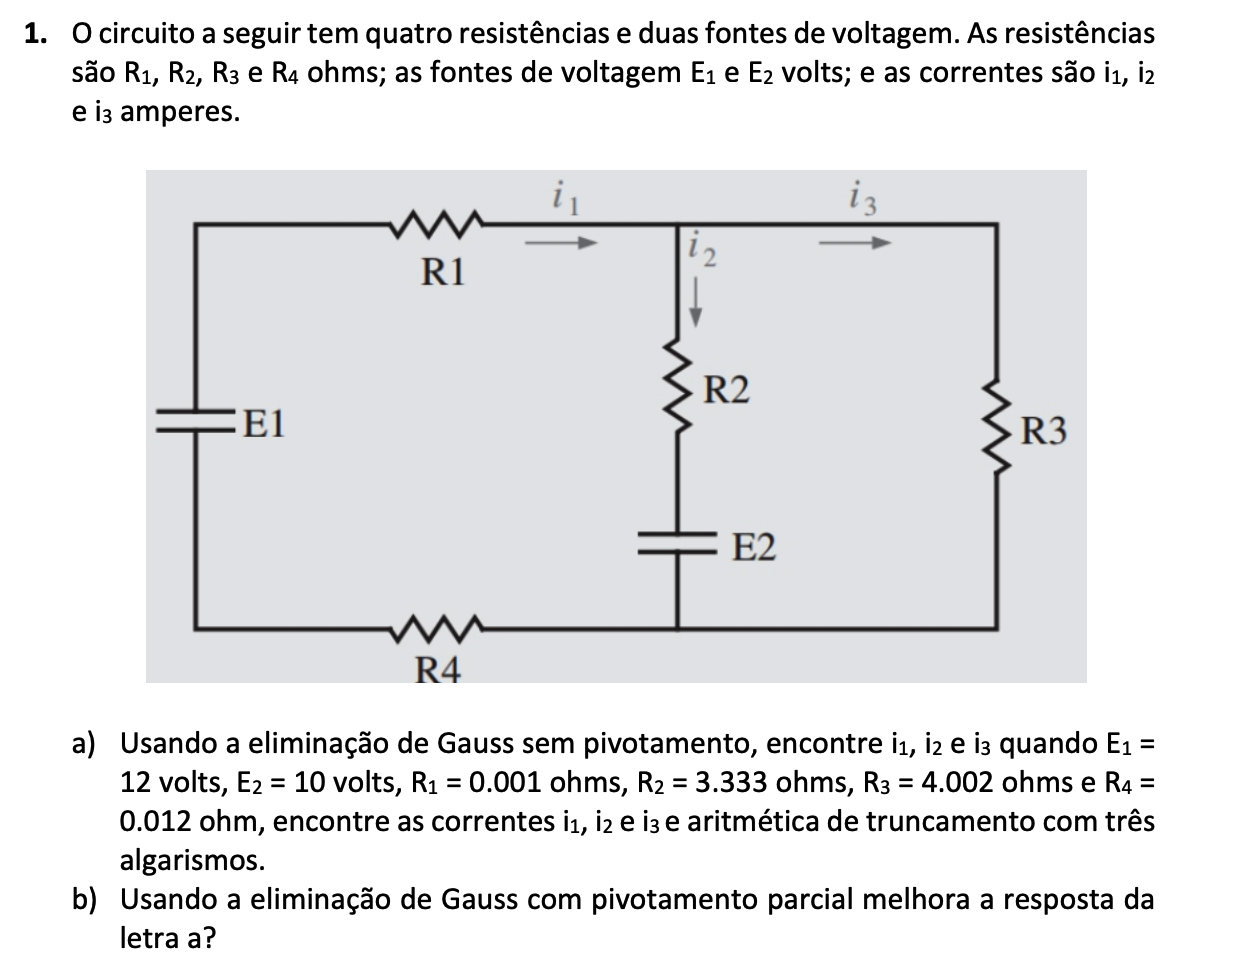

### a)

In [122]:
A = np.array([[1, -1, -1],
              [-0.001, 3.333, 0],
              [0, -3.333, 4.002]])

b = np.array([0, 2, 10])

A, b, solucao = eliminacao_gauss(A, b, pivotamento=False)

print(f'Matriz A: \n{A}\n')
print(f'Vetor b: \n{b}\n')
print(f'Solução: {solucao}\n')
print(f'Corrente i1: {solucao[0]}A')
print(f'Corrente i2: {solucao[1]}A')
print(f'Corrente i3: {solucao[2]}A')


Matriz A: 
[[ 1.000e+00 -1.000e+00 -1.000e+00]
 [ 0.000e+00  3.332e+00 -1.000e-03]
 [ 0.000e+00  0.000e+00  4.002e+00]]

Vetor b: 
[ 0.     2.    11.998]

Solução: [3.599 0.601 2.998]

Corrente i1: 3.599A
Corrente i2: 0.601A
Corrente i3: 2.998A


### b)

In [123]:
A = np.array([[1, -1, -1],
              [-0.001, 3.333, 0],
              [0, -3.333, 4.002]])

b = np.array([0, 2, 10])

A, b, solucao = eliminacao_gauss(A, b, pivotamento=True)

print(f'Matriz A: \n{A}\n')
print(f'Vetor b: \n{b}\n')
print(f'Solução: {solucao}\n')
print(f'Corrente i1: {solucao[0]}A')
print(f'Corrente i2: {solucao[1]}A')
print(f'Corrente i3: {solucao[2]}A\n')


Matriz A: 
[[ 1.    -1.    -1.   ]
 [ 0.    -3.333  4.002]
 [ 0.     0.     3.996]]

Vetor b: 
[ 0.   10.   11.99]

Solução: [3.602 0.602 3.   ]

Corrente i1: 3.602A
Corrente i2: 0.602A
Corrente i3: 3.0A



Embora para esse problema específico os resultados não terem mudado muito, o método de Eliminação de Gauss com pivotamento parcial é melhor que o método sem pivotamento pois o pivotamento parcial pode melhorar a estabilidade numérica, evitando divisões por números muito pequenos ou próximos de zero. Além disso, em sistemas com números muito grandes ou próximos de zero, o pivotamento parcial ajuda a não perder a diagonal dominante que, em caso de perda, pode levar a divergência do método iterativo.

## 2
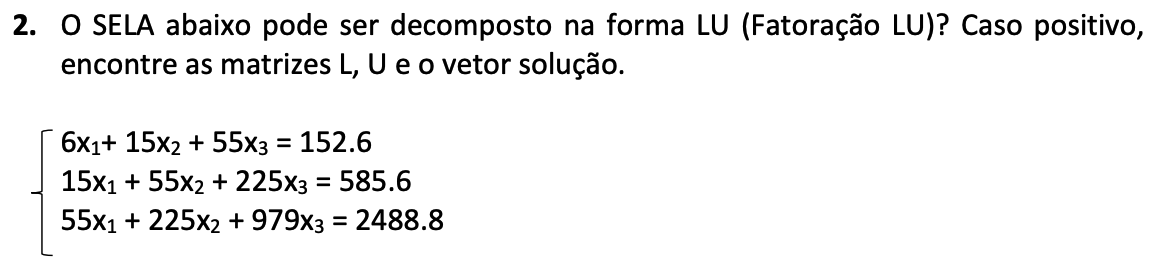

In [124]:
A = [[6, 15, 55],
     [15, 55, 225],
     [55, 225, 979]]

b = [152.6, 585.6, 2488.8]

L, U, solucao = fatoracao_LU(A, b)

print(f'Matriz L: \n{L}\n')
print(f'Matriz U: \n{U}\n')
print(f'Vetor solução: {solucao}')

Matriz L: 
[[1.         0.         0.        ]
 [2.5        1.         0.        ]
 [9.16666667 5.11764706 1.        ]]

Matriz U: 
[[ 6 15 55]
 [ 0 17 87]
 [ 0  0 28]]

Vetor solução: [1.30739276 3.69794859 1.62338936]


## 3
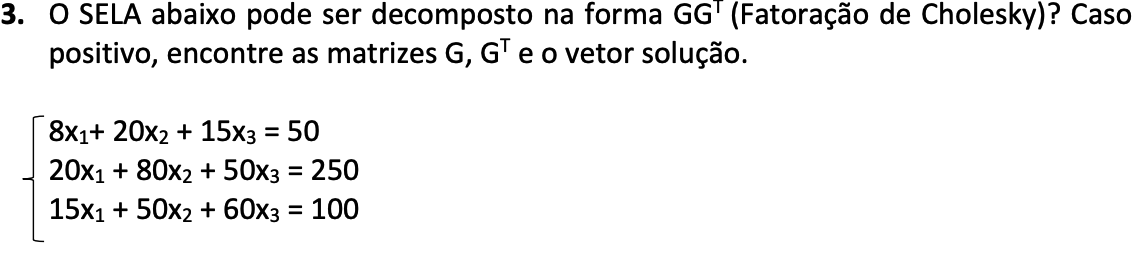




In [125]:
A = np.array([[8, 20, 15],
              [20, 80, 50],
              [15, 50, 60]])

b = np.array([50, 250, 100])

G, G_T, solucao = cholesky(A)

print(f'Matriz A: \n{A}\n')
print(f'Matriz G: \n{G}\n')
print(f'Matriz G_T: \n{G_T}\n')
print(f'Vetor solução: {solucao}')

Matriz A: 
[[ 8 20 15]
 [20 80 50]
 [15 50 60]]

Matriz G: 
[[2.82842712 0.         0.        ]
 [7.07106781 5.47722558 0.        ]
 [5.30330086 2.28217732 5.16397779]]

Matriz G_T: 
[[2.82842712 7.07106781 5.30330086]
 [0.         5.47722558 2.28217732]
 [0.         0.         5.16397779]]

Vetor solução: [-2.734375   4.8828125 -1.71875  ]


## 4 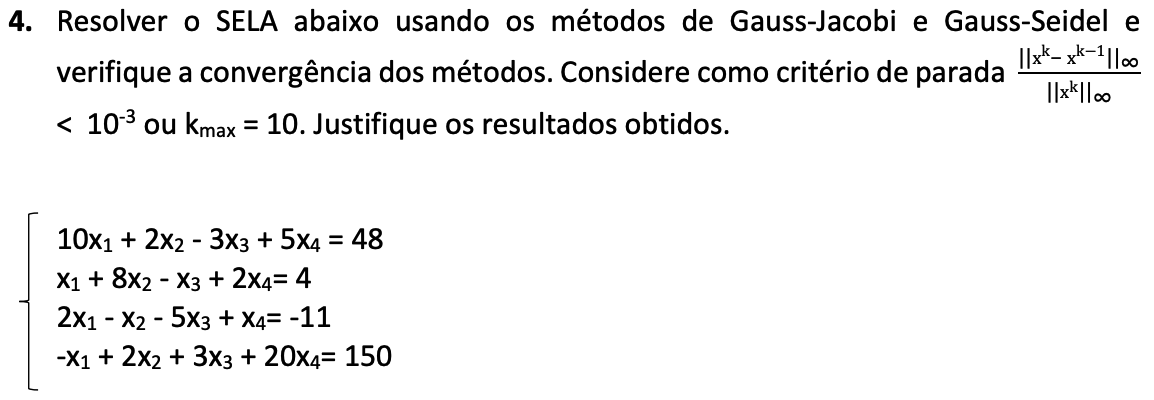

In [126]:
A = np.array([[10, 2, -3, 5],
              [1, 8, -1, 2],
              [2, -1, -5, 1],
              [-1, 2, 3, 20]])

b = [48, 4, -11, 150]

convergence_GJ, iters_GJ, x_GJ = gauss_jacobi(A, b, 10**-3, 10)
convergence_GS, iters_GS, x_GS = gauss_seidel(A, b, 10**-3, 10)

print(f'Matriz A: \n{A}\n')
print(f'Vetor b: {b}\n')

print('-----Método Gauss-Jacobi-----')
print(f'Convergiu? {convergence_GJ}')
print(f'Total de iterações: {iters_GJ}')
print(f'Vetor solução: {x_GJ}\n')

print('-----Método Gauss-Seidel-----')
print(f'Convergiu? {convergence_GS}')
print(f'Total de iterações: {iters_GS}')
print(f'Vetor solução: {x_GS}')

Matriz A: 
[[10  2 -3  5]
 [ 1  8 -1  2]
 [ 2 -1 -5  1]
 [-1  2  3 20]]

Vetor b: [48, 4, -11, 150]

-----Método Gauss-Jacobi-----
Convergiu? True
Total de iterações: 6
Vetor solução: [ 2.99719683 -1.00055991  4.99816576  7.00063537]

-----Método Gauss-Seidel-----
Convergiu? True
Total de iterações: 4
Vetor solução: [3.0013332019653327, -0.9998652252517699, 5.000522127101135, 6.999974863558274]


Ambos métodos convergiram, porém o método de Gauss-Seidel obteve a aproximação em um número menor de iterações do que o método de Gauss-Jacobi, sendo 4 iterações para o método Gauss-Seidel e 6 iterações para o método Gauss-Jacobi. Isso se deve ao fato de que o método de Gauss-Seidel atualiza os valores assim que são calculados, ao contrário do método de Gauss-Jacobi que calcula todos os valores de uma etapa para então atualizá-los. Em resumo, pode-se concluir que em geral, o método de Gauss-Jacobi é mais lento do que o método de Gauss-Seidel.

## 5
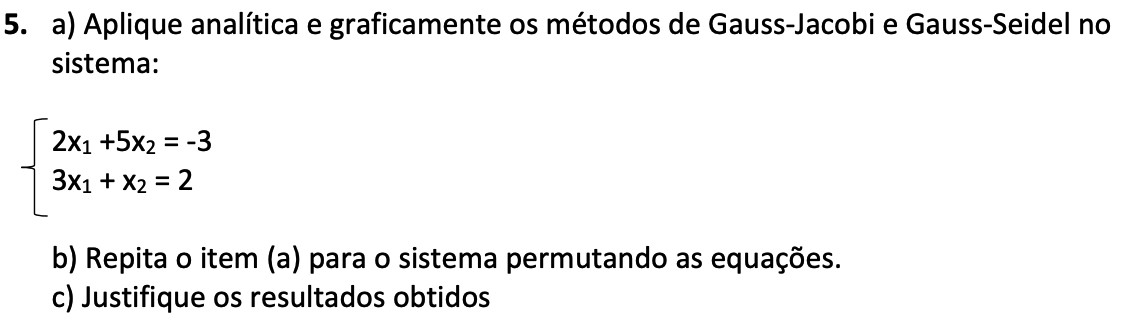

### a)

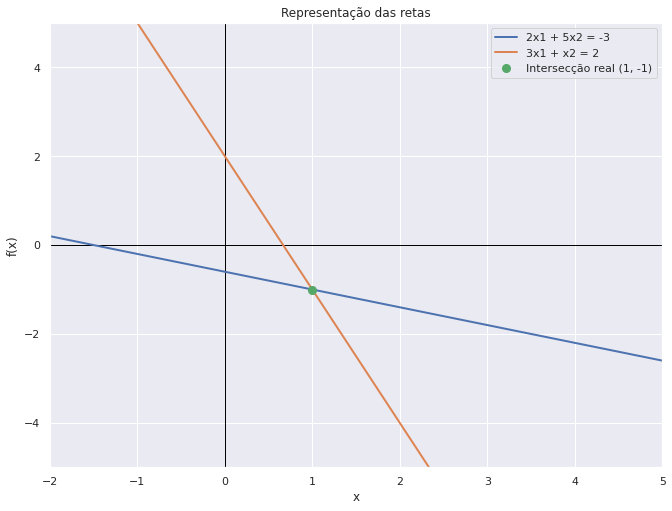

In [127]:
# Graficamente

sns.set()

f_0 = lambda x: -(2*x + 3)/5
f_1 = lambda x: -3*x + 2

curva = np.linspace(-10, 10, 2)
valores_f0 = [f_0(valor) for valor in curva]
valores_f1 = [f_1(valor) for valor in curva]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7.5))
fig.tight_layout(pad=3.0)


ax.axhline(y=0, color='#000', linewidth=1)
ax.axvline(x=0, color='#000', linewidth=1)
f0, = ax.plot(curva, valores_f0, ls='-', linewidth=2, )
f1, = ax.plot(curva, valores_f1, ls='-', linewidth=2, )
f0.set_label('2x1 + 5x2 = -3')
f1.set_label('3x1 + x2 = 2')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
intersec, = ax.plot(1, -1, 'o', markersize=8)
intersec.set_label('Intersecção real (1, -1)')
ax.legend()
ax.axis([-2, 5, -5, 5])
_ = ax.set_title('Representação das retas')


In [128]:
# Analiticamente

A = np.array([[2, 5],
              [3, 1]])

b = np.array([-3, 2])

x = np.linalg.solve(A, b)

convergence_GJ, iters_GJ, x_GJ = gauss_jacobi(A, b, 10**-3, 10)
convergence_GS, iters_GS, x_GS = gauss_seidel(A, b, 10**-3, 10)

print(f'Matriz A: \n{A}\n')
print(f'Vetor b: {b}\n')

print('-----Método Gauss-Jacobi-----')
print(f'Convergiu? {convergence_GJ}')
print(f'Total de iterações: {iters_GJ}')
print(f'Vetor solução: {x_GJ}\n')

print('-----Método Gauss-Seidel-----')
print(f'Convergiu? {convergence_GS}')
print(f'Total de iterações: {iters_GS}')
print(f'Vetor solução: {x_GS}')

Matriz A: 
[[2 5]
 [3 1]]

Vetor b: [-3  2]

-----Método Gauss-Jacobi-----
Convergiu? False
Total de iterações: 10
Vetor solução: [-59325.171875  71190.40625 ]

-----Método Gauss-Seidel-----
Convergiu? False
Total de iterações: 10
Vetor solução: [-563135146.0947266, 1689405440.2841797]


### b)

In [129]:
# Analiticamente permutando as equações

A = np.array([[3, 1],
              [2, 5]
              ])

b = np.array([2, -3])

x = np.linalg.solve(A, b)

convergence_GJ, iters_GJ, x_GJ = gauss_jacobi(A, b, 10**-3, 10)
convergence_GS, iters_GS, x_GS = gauss_seidel(A, b, 10**-3, 10)

print(f'Matriz A: \n{A}\n')
print(f'Vetor b: {b}\n')

print('-----Método Gauss-Jacobi-----')
print(f'Convergiu? {convergence_GJ}')
print(f'Total de iterações: {iters_GJ}')
print(f'Vetor solução: {x_GJ}\n')

print('-----Método Gauss-Seidel-----')
print(f'Convergiu? {convergence_GS}')
print(f'Total de iterações: {iters_GS}')
print(f'Vetor solução: {x_GS}')

Matriz A: 
[[3 1]
 [2 5]]

Vetor b: [ 2 -3]

-----Método Gauss-Jacobi-----
Convergiu? True
Total de iterações: 7
Vetor solução: [ 0.99968395 -0.99968395]

-----Método Gauss-Seidel-----
Convergiu? True
Total de iterações: 5
Vetor solução: [0.9999578600823046, -0.9999831440329219]


### c)

Ao permutar as equações de um sistema linear podemos alterar a diagonal dominante e, ao alterar a diagonal dominante, os métodos Gauss-Jacobi e Gauss-Seidel podem divergir do resultado esperado, como observado na questão (a) onde essa condição não era satisfeita. Após permutarmos o sistema linear os métodos convergiram para o resultado aproximado esperado, como pode ser observado na questão (b) e no gráfico abaixo.

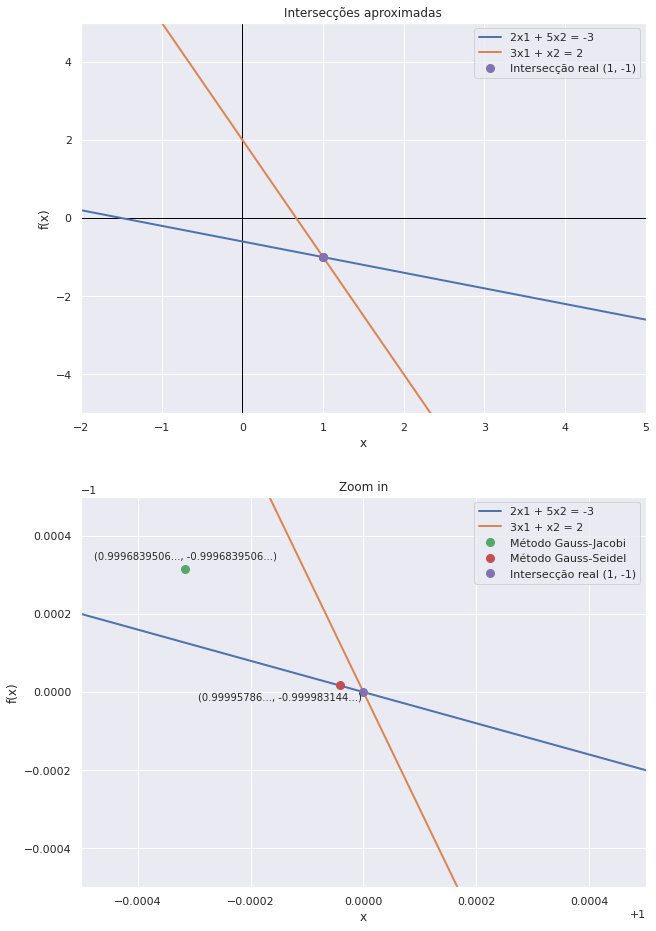

In [130]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,14))
fig.tight_layout(pad=5.0)

for ax in axs:
    ax.axhline(y=0, color='#000', linewidth=1)
    ax.axvline(x=0, color='#000', linewidth=1)
    f0, = ax.plot(curva, valores_f0, ls='-', linewidth=2, )
    f1, = ax.plot(curva, valores_f1, ls='-', linewidth=2, )
    f0.set_label('2x1 + 5x2 = -3')
    f1.set_label('3x1 + x2 = 2')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    p0, = ax.plot(x_GJ[0], x_GJ[1], 'o', markersize=8)
    p1, = ax.plot(x_GS[0], x_GS[1], 'o', markersize=8)
    p3, = ax.plot(1, -1, 'o', markersize=8)
    p3.set_label('Intersecção real (1, -1)')
    ax.legend()


axs[0].axis([-2, 5, -5, 5])
axs[0].set_title('Intersecções aproximadas')

axs[1].axis([0.9995, 1.0005, -1.0005, -0.9995])
p0.set_label('Método Gauss-Jacobi')
p1.set_label('Método Gauss-Seidel')
axs[1].legend()
_ = axs[1].set_title('Zoom in')

_ = axs[1].annotate(f'({trunc(x_GJ[0], 10)}..., {trunc(x_GJ[1], 10)}...)',
             (x_GJ[0], x_GJ[1]),
             textcoords="offset points",
             xytext=(0,10),
             ha='center', fontsize=10)

_ = axs[1].annotate(f'({trunc(x_GS[0], 10)}..., {trunc(x_GS[1], 10)}...)',
             (x_GS[0], x_GS[1]),
             textcoords="offset points",
             xytext=(-60,-15),
             ha='center', fontsize=10)